### Контрольное мероприятие №1

| Автор        | Дата последнего обновления |
|:------------:|:--------------------------:|
| Чушников Е.О.| 15.03.2024                 |

In [121]:
import random
import pytest
import asyncio
from datetime import datetime

<h3 align="center"> 1. Декораторы </h1>

<h4 align="left">1.1 Случайным образом выбрать один из алгоритмов из папки "КМ1 алгоритмы.</h4>

In [122]:
print(random.randint(1, 33))

20


Выбранная функция для тестирования:

In [123]:
def hamming_distance(string1: str, string2: str) -> int:
    """Calculate the Hamming distance between two equal length strings
    In information theory, the Hamming distance between two strings of equal
    length is the number of positions at which the corresponding symbols are
    different. https://en.wikipedia.org/wiki/Hamming_distance

    Args:
        string1 (str): Sequence 1
        string2 (str): Sequence 2

    Returns:
        int: Hamming distance
    """
    if len(string1) != len(string2):
        raise ValueError("String lengths must match!")

    count = 0

    for char1, char2 in zip(string1, string2):
        if char1 != char2:
            count += 1

    return count

1.2. Случайным образом выбрать одну из целевых задач для
декорирования:
1.2.1. отладка функции (добрался ли алгоритм до той или иной части кода,
выполнилось ли целевое условие ветвления, какое количество раз сработал
цикл и т. д.);
1.2.2. профилирование кода (оценка времени исполнения программы
целиком или какой-то из частей);
1.2.3. сохранение промежуточных данных;
1.2.4. тестирование кода.

In [124]:
p=(random.randint(1, 4))
if (p==1):
    print('отладка функции')
elif (p==2):
    print('профилирование кода')
elif (p==3):
    print('сохранение промежуточных данных')
elif (p==4):
    print('тестирование кода')         

отладка функции


1.3. Для функции, выбранной в пункте 1.1, создать декоратор,
выполняющий задачу, выбранную в пункте 1.2.

In [125]:
def func_Decorator(func):
    def Wrapper (*args):
        for arg in args:
            if (isinstance(arg, str)):
                print("аргумент имеет тип данных строка")
            else: print("аргумент не строка")
        res = func(*args)
        return res
    return Wrapper

Подключение декоратора 

In [126]:
@func_Decorator
def hamming_distance(string1: str, string2: str) -> int:
    if len(string1) != len(string2):
        raise ValueError("String lengths must match!")

    count = 0

    for char1, char2 in zip(string1, string2):
        if char1 != char2:
            count += 1

    return count

In [127]:
A='hello'
B='world'
hamming_distance(A,B)

аргумент имеет тип данных строка
аргумент имеет тип данных строка


4

1.4 Добавить к декоратору параметр, исходя из контекста  пунктов 1.1 и 1.2


In [128]:
def func_Decorator_WithDebug(DebugMod):
    def func_Decorator(func):
        def wrapper (*args):
            if DebugMod :
                for arg in args:
                    if (isinstance(arg, str)):
                        print("аргумент имеет тип данных строка")
                    else: print("аргумент не строка")
            res = func(*args)
            return res
        return wrapper 
    return func_Decorator

Подключение декоратора с параметром 

In [129]:
debugMod = True
@func_Decorator_WithDebug(debugMod)
def hamming_distance(string1: str, string2: str) -> int:
    if len(string1) != len(string2):
        raise ValueError("String lengths must match!")

    count = 0

    for char1, char2 in zip(string1, string2):
        if char1 != char2:
            count += 1

    return count

In [130]:
A='hello'
B='world'
hamming_distance(A,B)

аргумент имеет тип данных строка
аргумент имеет тип данных строка


4

2.1. Провести тестирование функции, выбранной в пункте 1.1., используя
assert. Предложить не менее 5 тестов, в том числе тесты, приводящие к
аварийному завершению кода.

In [131]:
%%writefile ./main.py
def hamming_distance(string1: str, string2: str) -> int:
    assert  type(string1) is  str, 'введенные данные  не являются строкой '
    assert  type(string2) is  str, 'введенные данные  не являются строкой '
    assert  len(string2)==len(string1), 'длина строк не совпадает'

    count = 0

    for char1, char2 in zip(string1, string2):
        if char1 != char2:
            count += 1
    assert count!=0,  'все элементы совпадают'
    assert count!=len(string1), 'все элементы не совпадают'
    return count

Overwriting ./main.py


In [132]:
A='world'
B='world'
hamming_distance(A,B)

аргумент не строка
аргумент имеет тип данных строка


TypeError: object of type 'int' has no len()

2.2. Повторить пункт 2.1, используя pytest.

In [ ]:
%%writefile ./tests.py

from main import *
def test_one():
    assert hamming_distance('hello','world') == 4 

def test_two():
    assert hamming_distance('motor','spirit') == 1

def test_three():
    assert hamming_distance('cover','volan') == 4

def test_four():
    assert hamming_distance('sorry','worry') == 1

def test_five():
    assert hamming_distance('dogs','cats') == 2

Overwriting ./tests.py


<h3 align="center"> Результат выполнения pytest </h1>

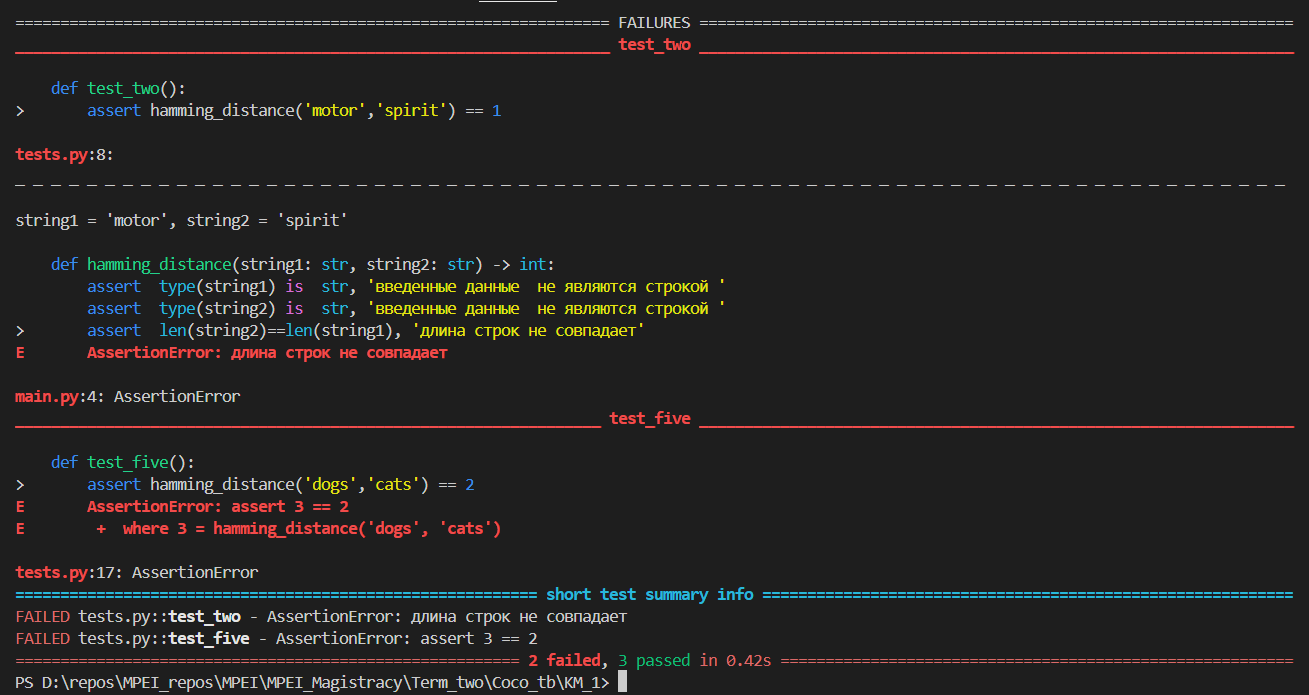

3.1. Используя алгоритм, выбранный в п. 1.1, запустить три асинхронных
потока, работающих с общими входными и выходными данными этого
алгоритма.

In [ ]:
delays = [1.0, 2.0, 3.0]
randomNoise = [-0.1, 0, 0.1]

async def hamming_distance(task_no,delay,string1: str, string2: str) -> int:

    print(f"Задача {task_no} запустилась в {datetime.now().strftime('%H:%M:%S.%f')[:-4]} время выполнения {2*delay} [с] ")
    print("")
    await asyncio.sleep(delay)

    if len(string1) != len(string2):
        raise ValueError("String lengths must match!")

    count = 0

    for char1, char2 in zip(string1, string2):
        if char1 != char2:
            count += 1
  
    print(f"Задача {task_no} выполнена в {datetime.now().strftime('%H:%M:%S.%f')[:-4]}")
    print("")

    return count

async def main():    
        delay = random.choice(delays) + random.choice(randomNoise)
        task1  = loop.create_task (hamming_distance (1,delay,'hello','world'))
        delay = random.choice(delays) + random.choice(randomNoise)
        task2 = loop.create_task (hamming_distance (2,delay,'hello','world'))
        delay = random.choice(delays) + random.choice(randomNoise)
        task3 = loop.create_task (hamming_distance (3,delay,'hello','world'))

        await asyncio.wait([task1,task2,task3])

await main()

Задача 1 запустилась в 23:14:21.24 время выполнения 6.0 [с] 

Задача 2 запустилась в 23:14:21.24 время выполнения 1.8 [с] 

Задача 3 запустилась в 23:14:21.24 время выполнения 6.2 [с] 

Задача 2 выполнена в 23:14:22.15

Задача 1 выполнена в 23:14:24.25

Задача 3 выполнена в 23:14:24.34

